# importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import os
from sklearn.model_selection import train_test_split
# from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


## Change directory to the dataset directory traffic-sign-dataset

In [2]:
os.chdir('traffic-sign-dataset/')

## Change GPU device to the default GPU detected on your PC

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Num GPUs Available:  1


## Import all the training data to the variable : data
- Training data : 43 classes, 39209 total images
- Training data set is downloaded from : Kaggle.com

In [4]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()
for i in range(classes):
    print("Read the class  :", i+1,"/ 43")
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

Read the class  : 1 / 43
Read the class  : 2 / 43
Read the class  : 3 / 43
Read the class  : 4 / 43
Read the class  : 5 / 43
Read the class  : 6 / 43
Read the class  : 7 / 43
Read the class  : 8 / 43
Read the class  : 9 / 43
Read the class  : 10 / 43
Read the class  : 11 / 43
Read the class  : 12 / 43
Read the class  : 13 / 43
Read the class  : 14 / 43
Read the class  : 15 / 43
Read the class  : 16 / 43
Read the class  : 17 / 43
Read the class  : 18 / 43
Read the class  : 19 / 43
Read the class  : 20 / 43
Read the class  : 21 / 43
Read the class  : 22 / 43
Read the class  : 23 / 43
Read the class  : 24 / 43
Read the class  : 25 / 43
Read the class  : 26 / 43
Read the class  : 27 / 43
Read the class  : 28 / 43
Read the class  : 29 / 43
Read the class  : 30 / 43
Read the class  : 31 / 43
Read the class  : 32 / 43
Read the class  : 33 / 43
Read the class  : 34 / 43
Read the class  : 35 / 43
Read the class  : 36 / 43
Read the class  : 37 / 43
Read the class  : 38 / 43
Read the class  : 39 

## Converting list into numpy arrays

In [5]:
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


## Saving labels and data for future use

In [6]:
# os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

## Loading data and labels

In [7]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [ ]:
# To display dataset images randomly

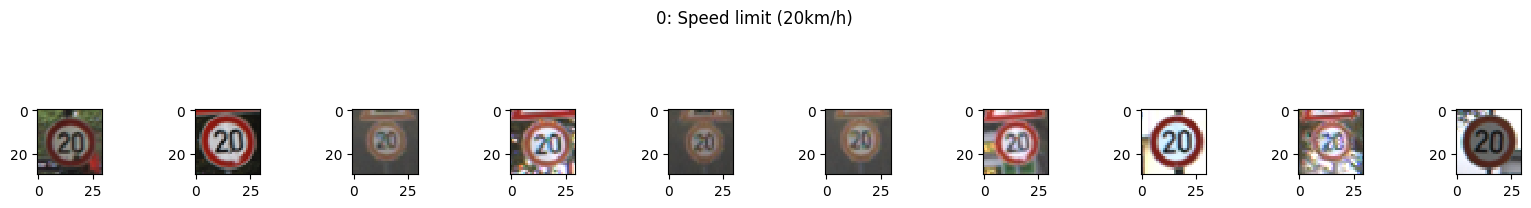

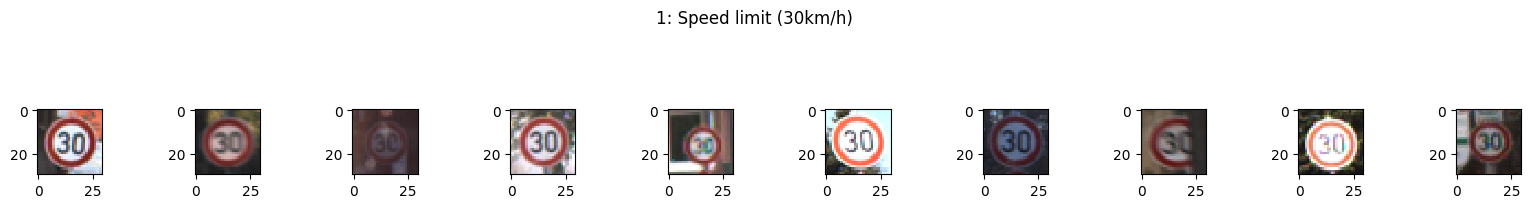

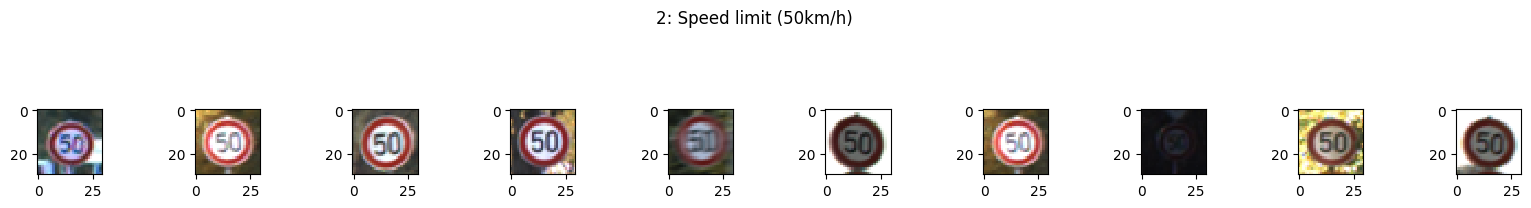

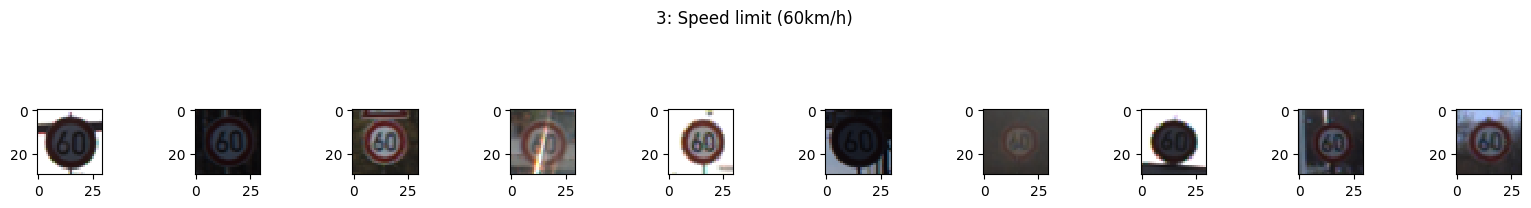

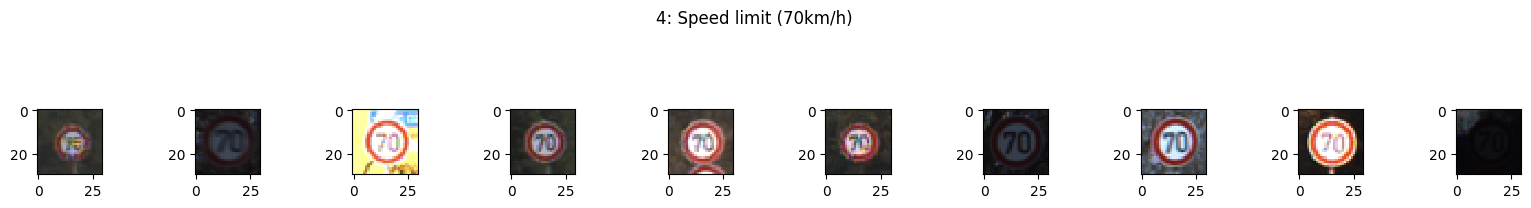

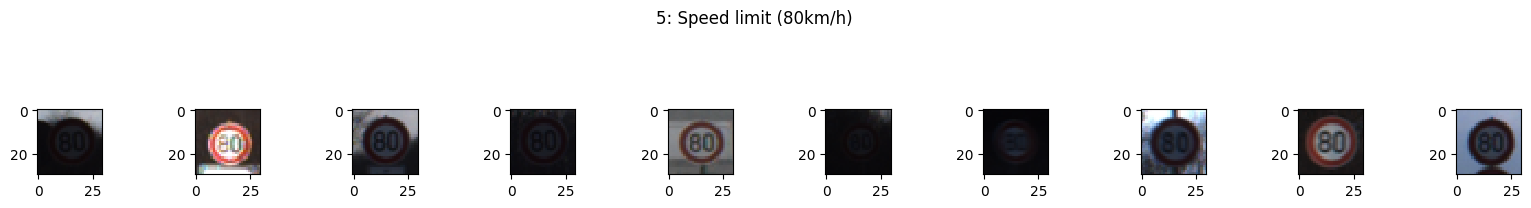

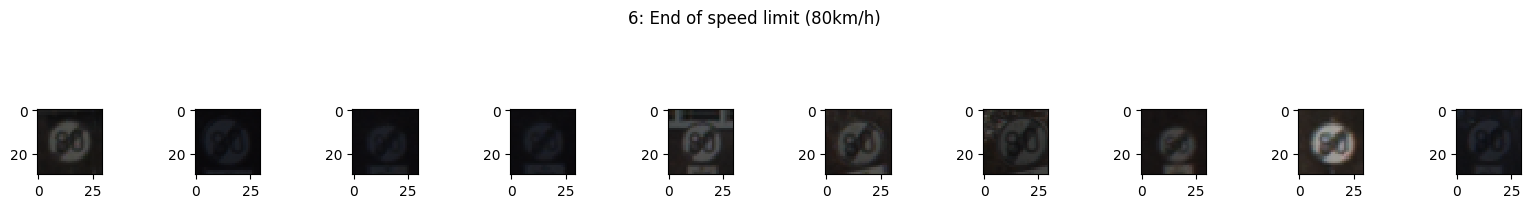

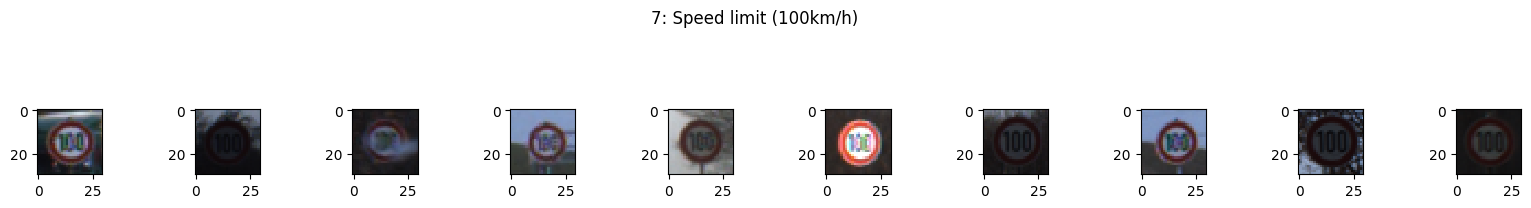

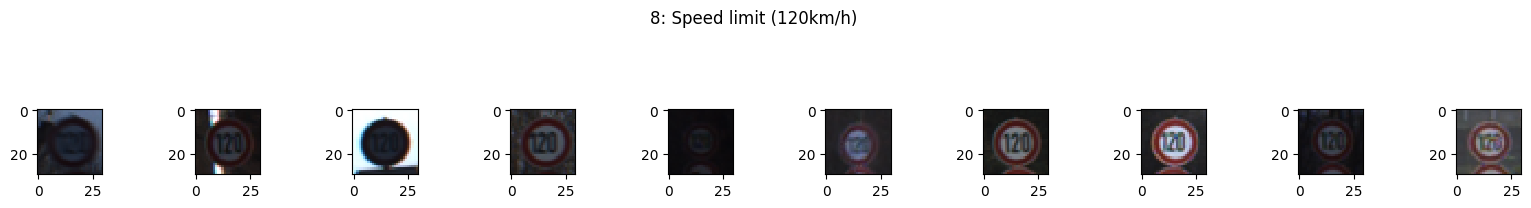

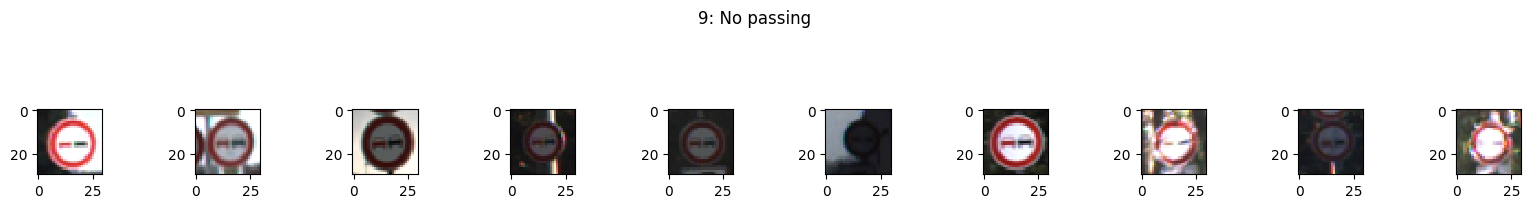

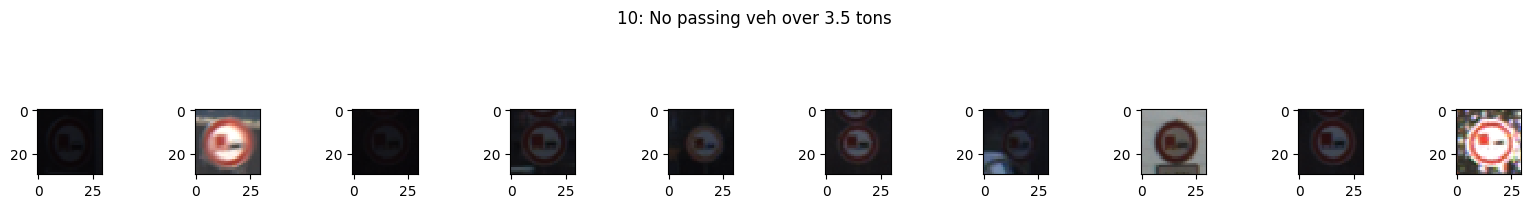

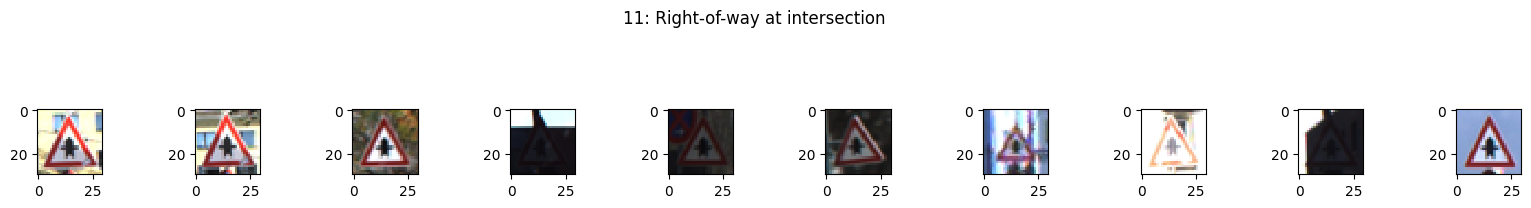

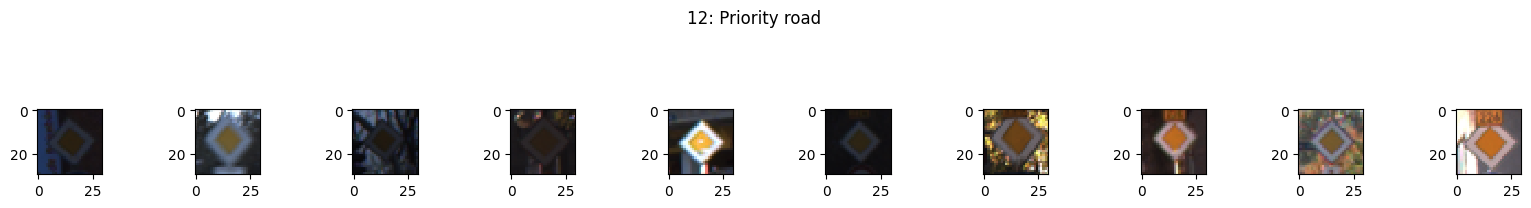

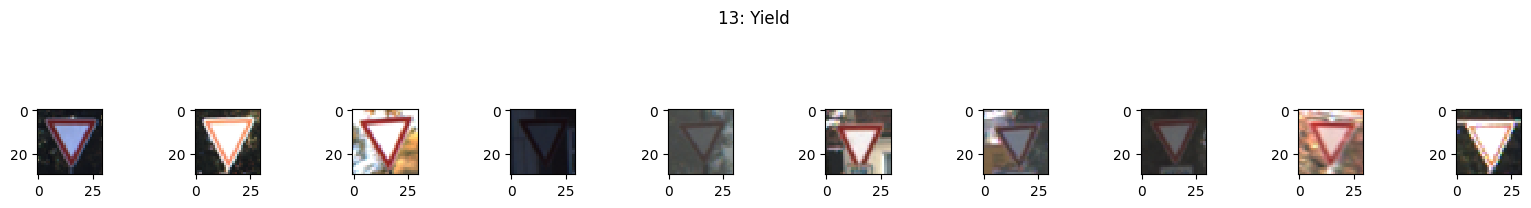

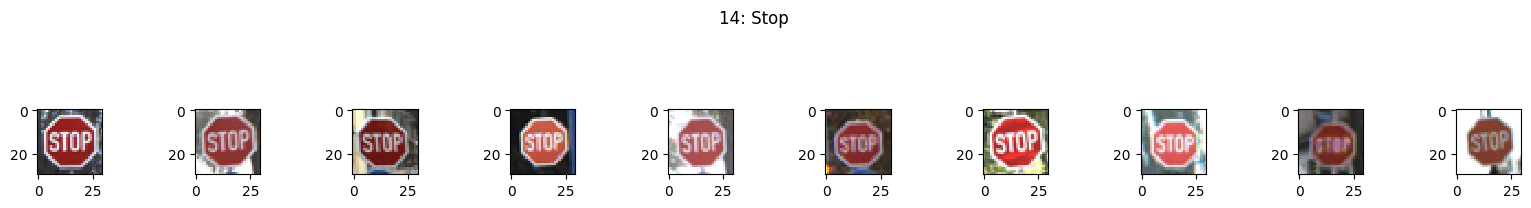

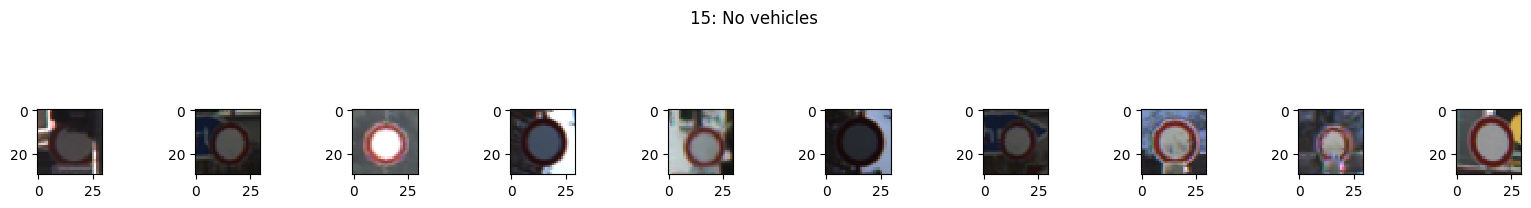

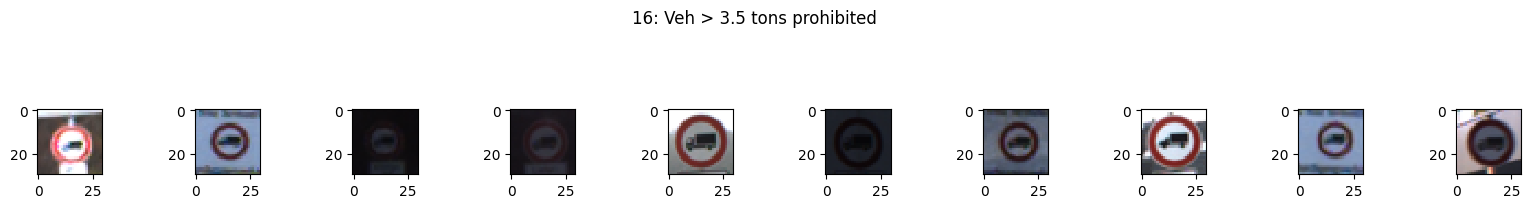

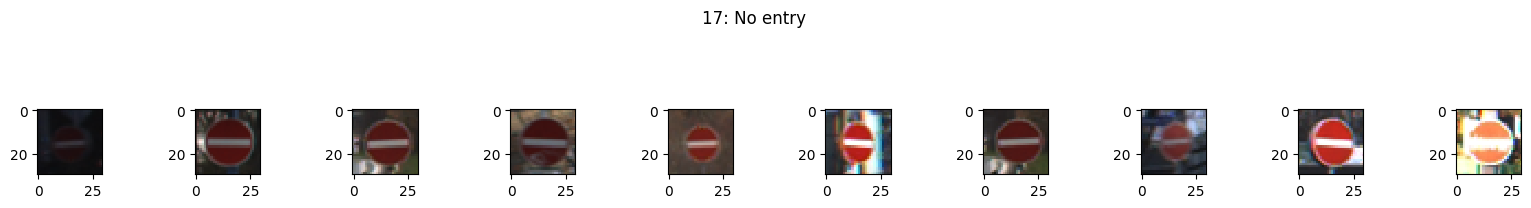

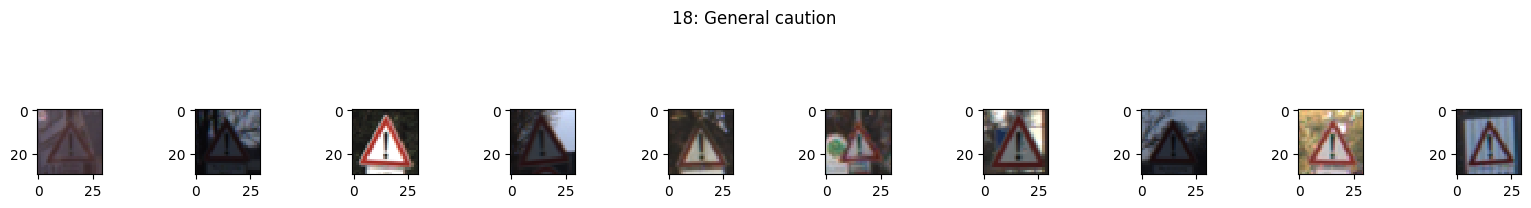

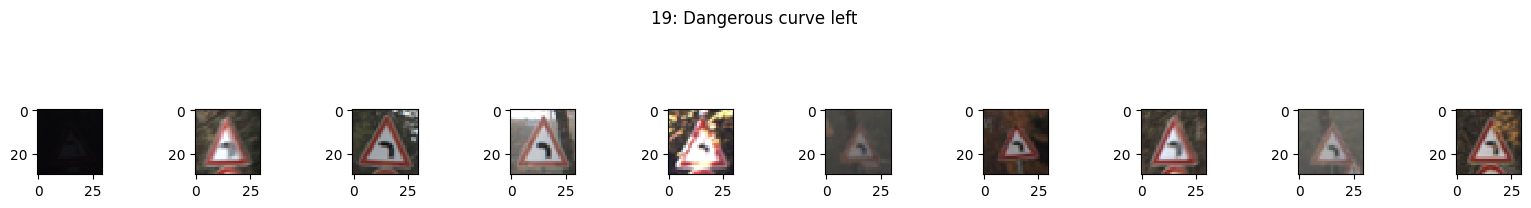

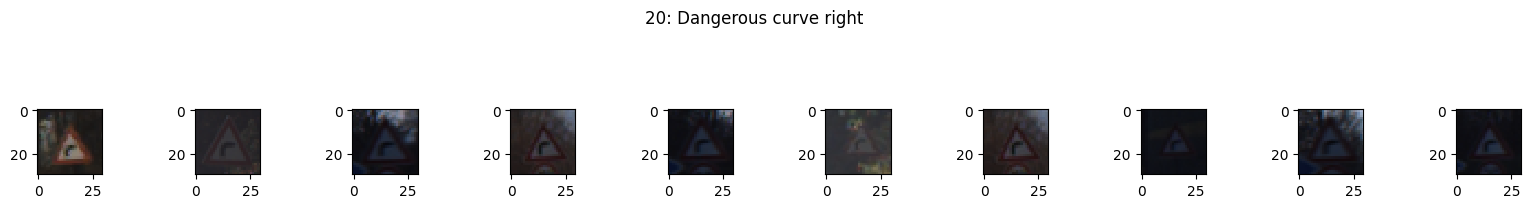

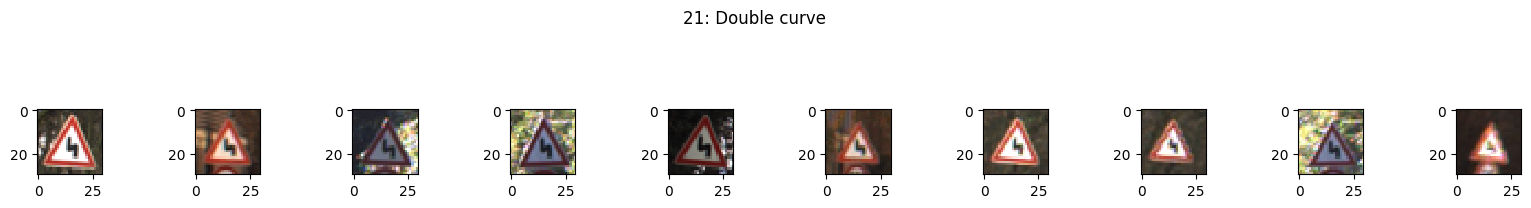

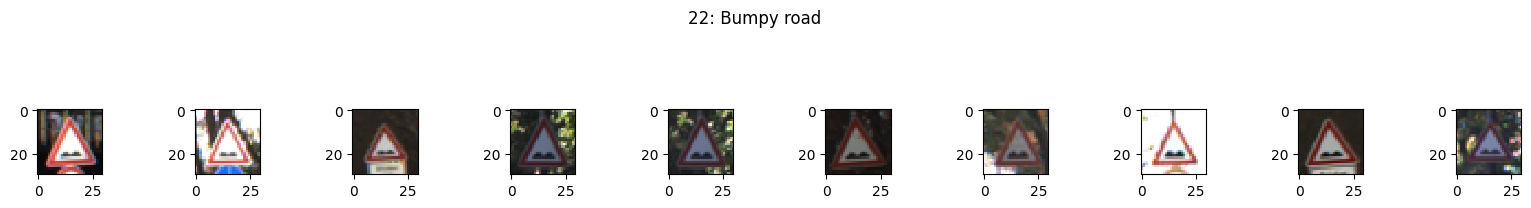

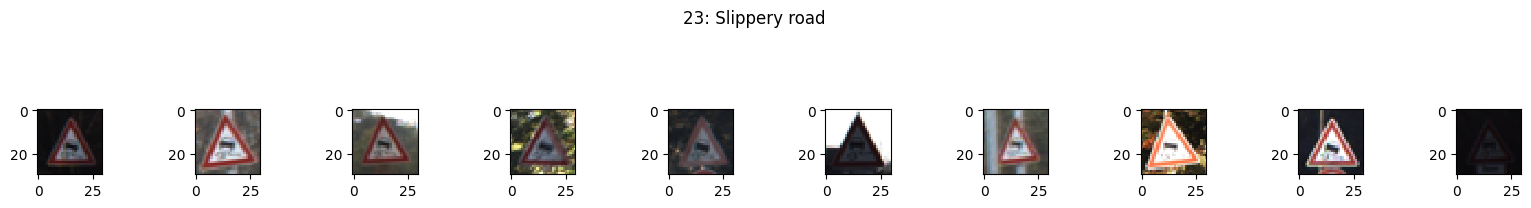

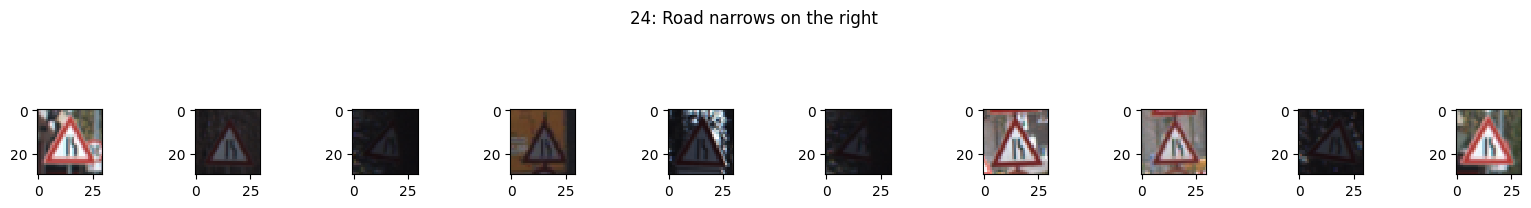

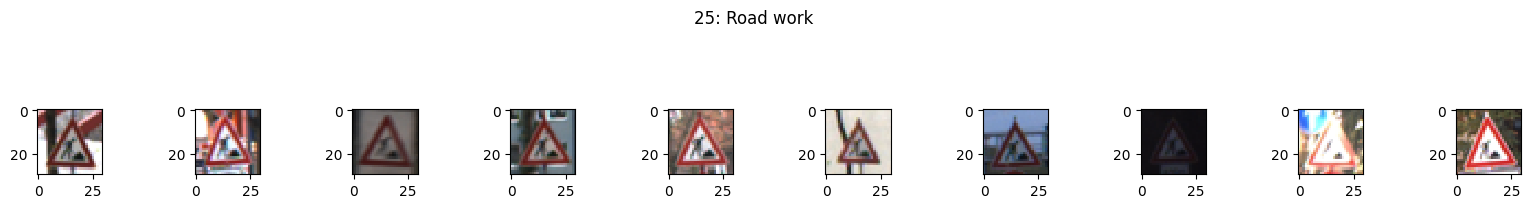

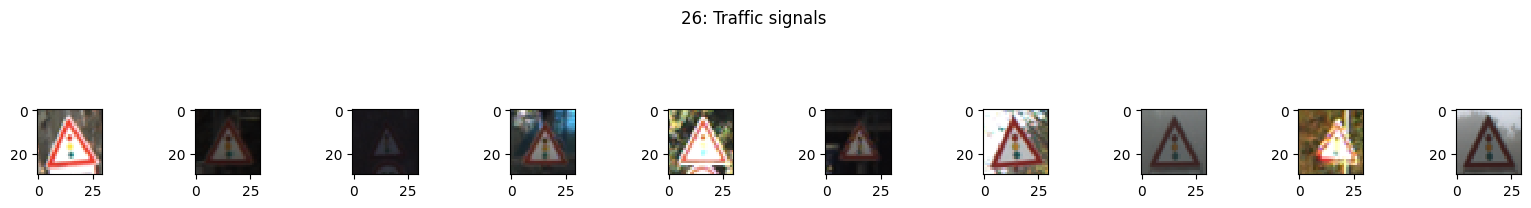

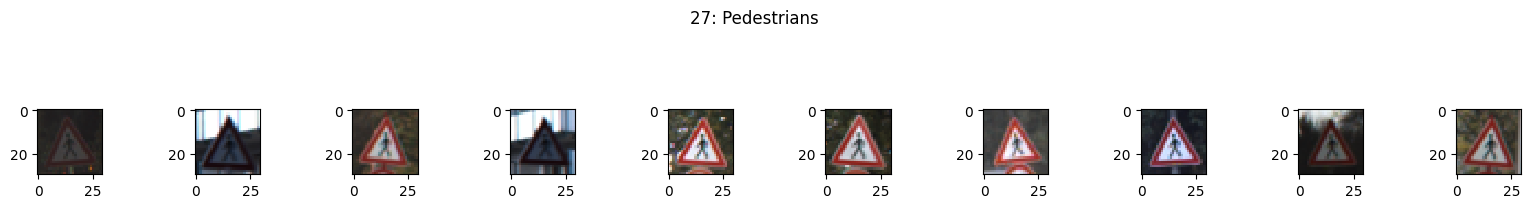

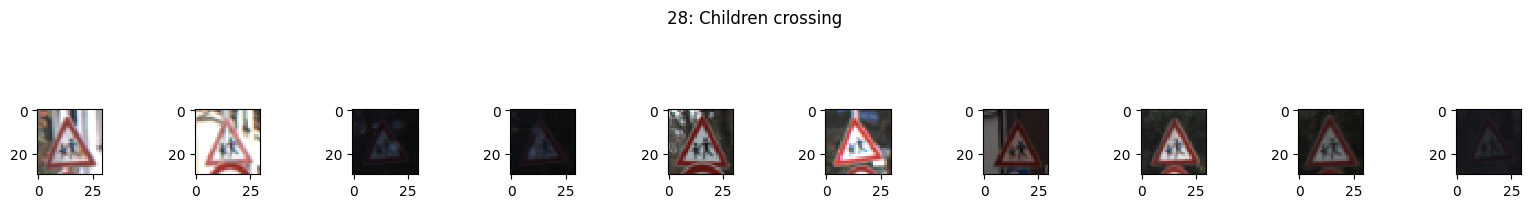

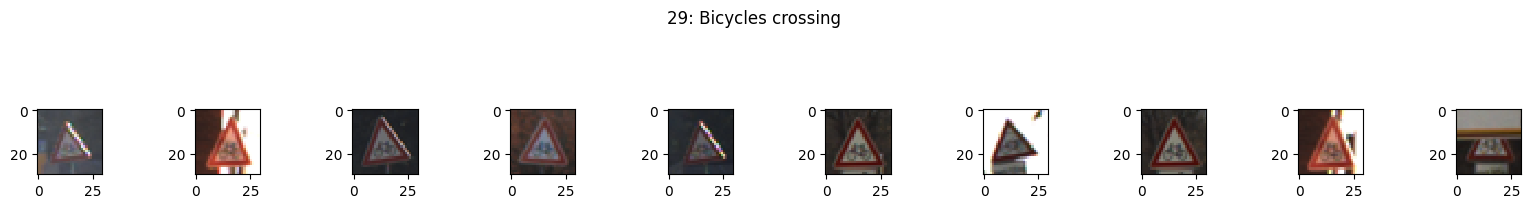

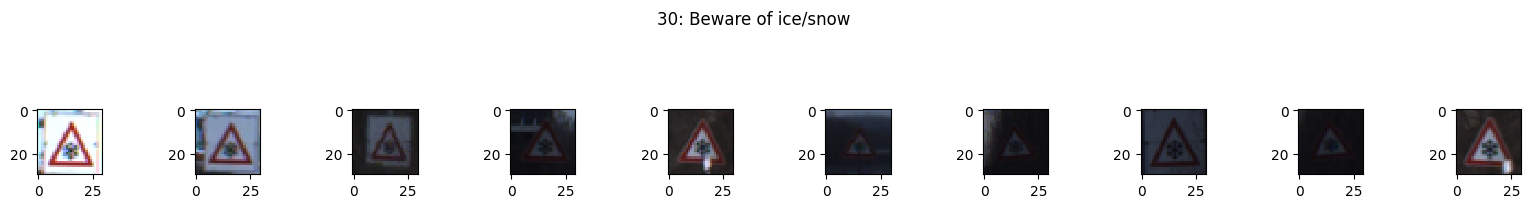

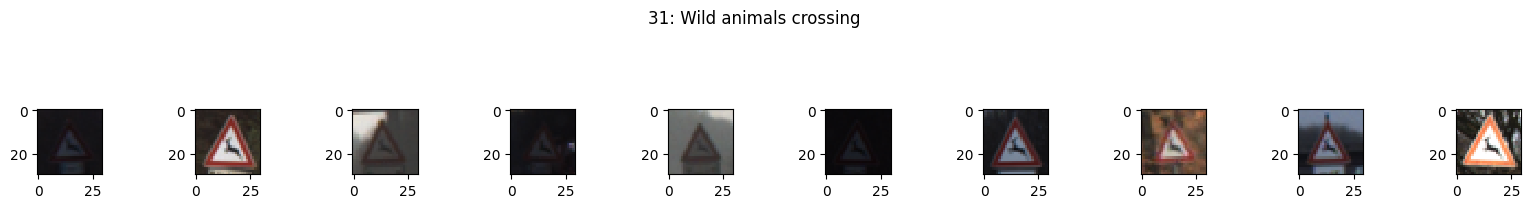

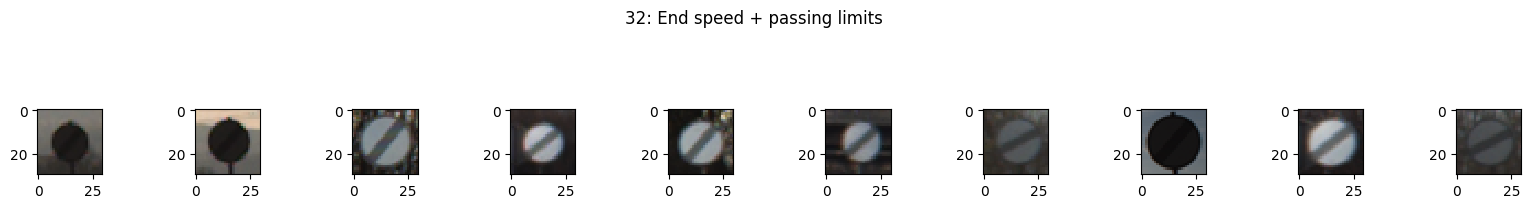

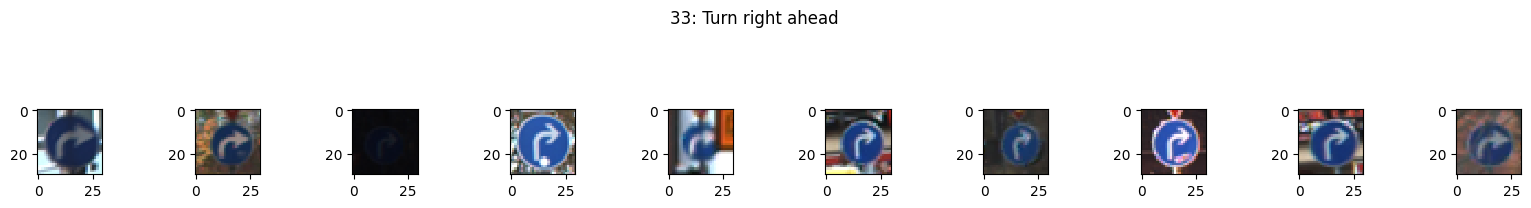

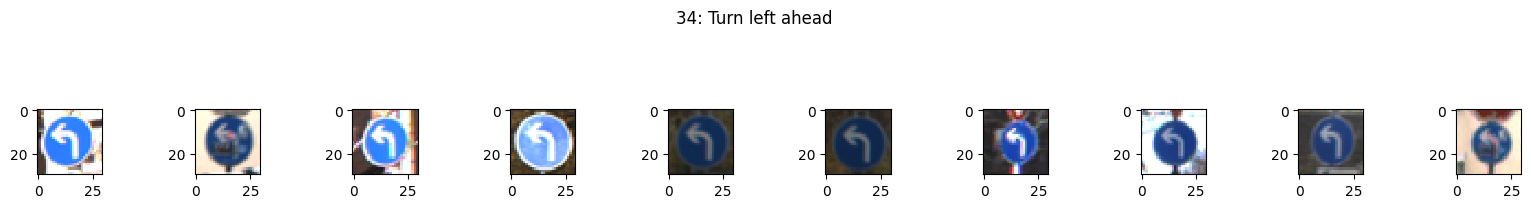

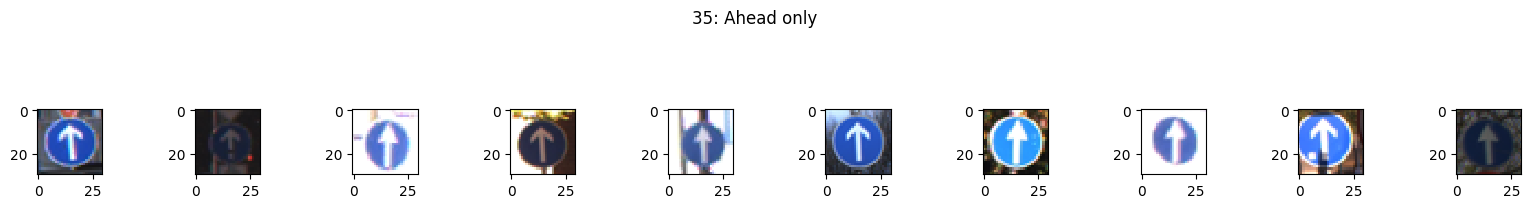

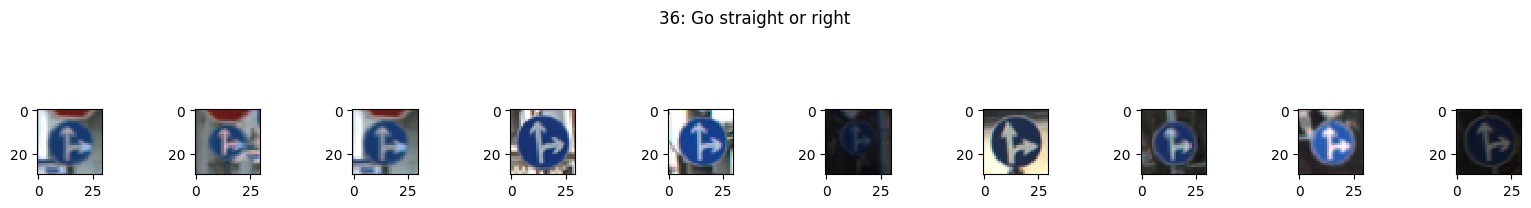

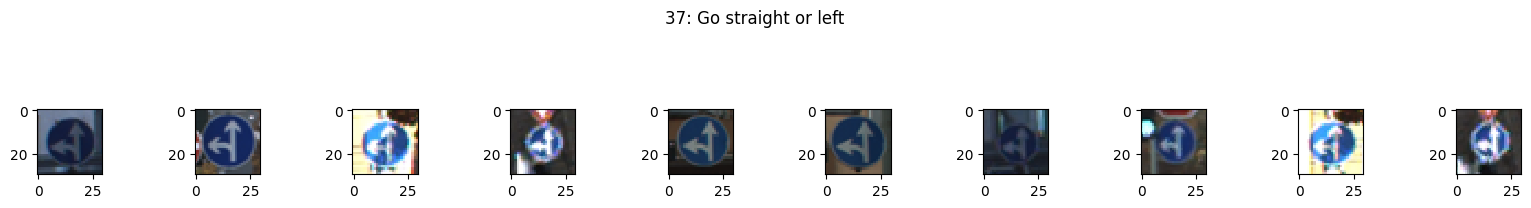

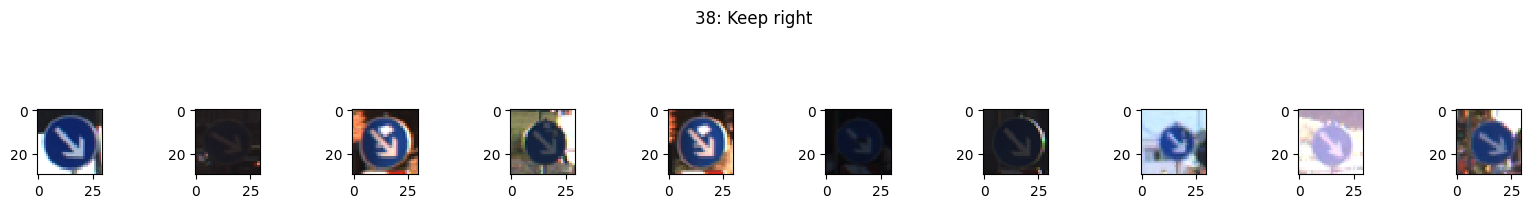

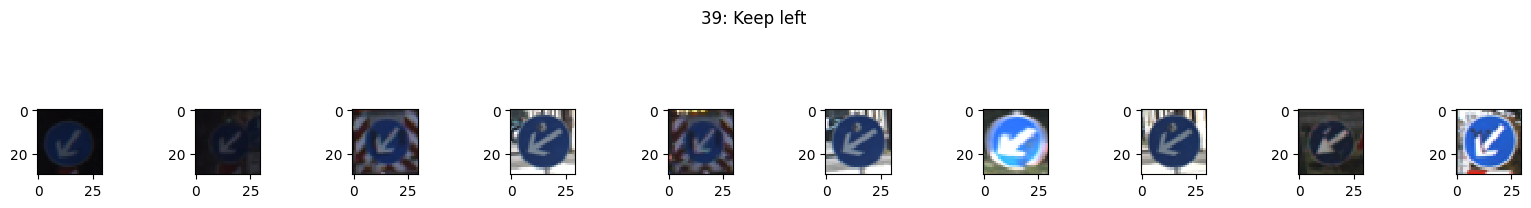

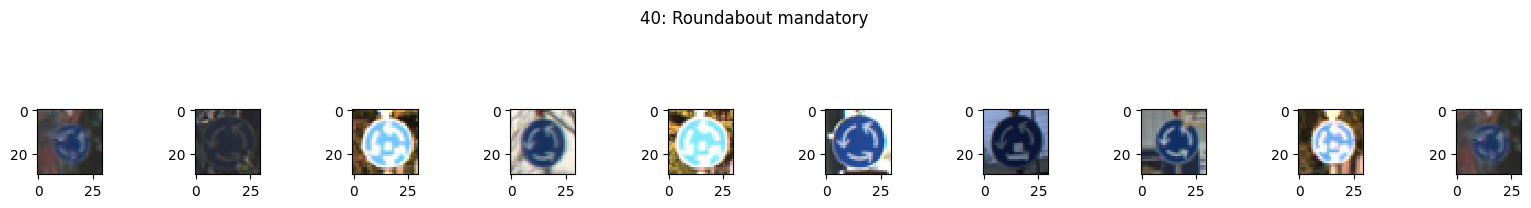

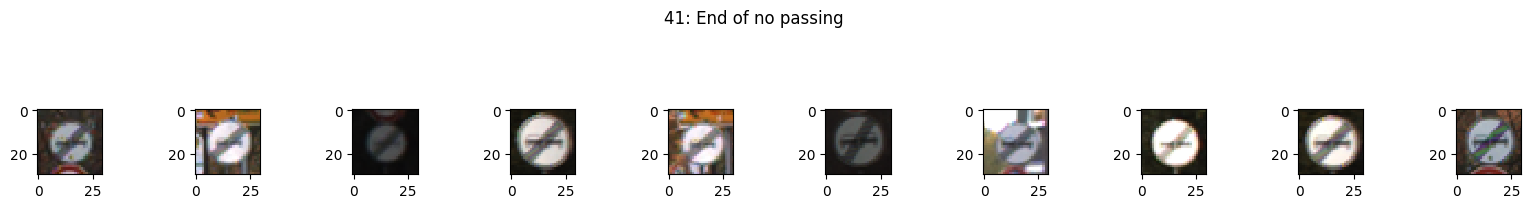

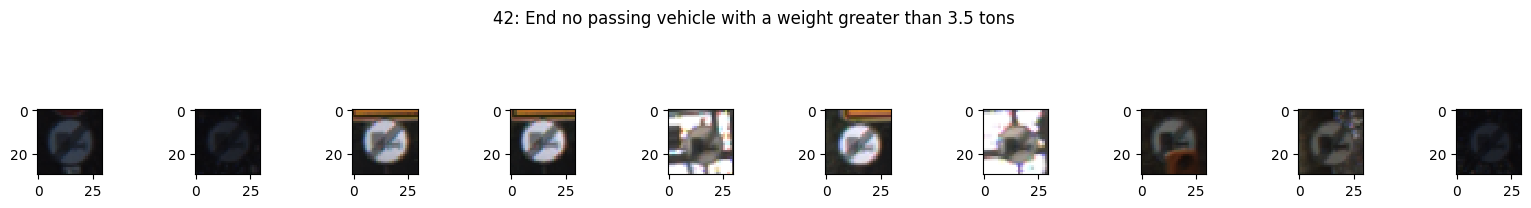

In [8]:
sign_names ={ 1:'Speed limit (20km/h)',
           2:'Speed limit (30km/h)',
           3:'Speed limit (50km/h)',
           4:'Speed limit (60km/h)',
           5:'Speed limit (70km/h)',
           6:'Speed limit (80km/h)',
           7:'End of speed limit (80km/h)',
           8:'Speed limit (100km/h)',
           9:'Speed limit (120km/h)',
           10:'No passing',
           11:'No passing veh over 3.5 tons',
           12:'Right-of-way at intersection',
           13:'Priority road',
           14:'Yield',
           15:'Stop',
           16:'No vehicles',
           17:'Veh > 3.5 tons prohibited',
           18:'No entry',
           19:'General caution',
           20:'Dangerous curve left',
           21:'Dangerous curve right',
           22:'Double curve',
           23:'Bumpy road',
           24:'Slippery road',
           25:'Road narrows on the right',
           26:'Road work',
           27:'Traffic signals',
           28:'Pedestrians',
           29:'Children crossing',
           30:'Bicycles crossing',
           31:'Beware of ice/snow',
           32:'Wild animals crossing',
           33:'End speed + passing limits',
           34:'Turn right ahead',
           35:'Turn left ahead',
           36:'Ahead only',
           37:'Go straight or right',
           38:'Go straight or left',
           39:'Keep right',
           40:'Keep left',
           41:'Roundabout mandatory',
           42:'End of no passing',
           43:'End no passing vehicle with a weight greater than 3.5 tons' }

labels = np.unique(y_train)
for label in labels:
    label_indices = np.where(y_train==label)[0]
    fig = plt.figure(figsize=(20, 10))
    for i in range(10):
        rand_index = np.random.choice(label_indices)
        sub = fig.add_subplot(10, 10, i+1)
        sub.imshow(X_train[rand_index], interpolation='nearest')
    plt.suptitle(str(label) + ': ' + sign_names[label+1])
    plt.show()

## Converting labels to onehot encoding

In [9]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## We build a CNN model to classify the images into their respective categories.

In [10]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [11]:
# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fitting the model with training data set

In [12]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/20
31367/31367 [==============================] - 12s 385us/step - loss: 2.3802 - accuracy: 0.3796 - val_loss: 0.8308 - val_accuracy: 0.7752
Epoch 2/20
31367/31367 [==============================] - 8s 269us/step - loss: 0.8798 - accuracy: 0.7408 - val_loss: 0.3275 - val_accuracy: 0.9169
Epoch 3/20
31367/31367 [==============================] - 8s 264us/step - loss: 0.5649 - accuracy: 0.8347 - val_loss: 0.1856 - val_accuracy: 0.9538
Epoch 4/20
31367/31367 [==============================] - 8s 264us/step - loss: 0.4276 - accuracy: 0.8741 - val_loss: 0.1490 - val_accuracy: 0.9607
Epoch 5/20
31367/31367 [==============================] - 8s 263us/step - loss: 0.3910 - accuracy: 0.8836 - val_loss: 0.1279 - val_accuracy: 0.9654
Epoch 6/20
31367/31367 [==============================] - 8s 262us/step - loss: 0.3457 - accuracy: 0.9028 - val_loss: 0.1356 - val_accuracy: 0.9624
Epoch 7/20
31367/31367 [==============================] - 8s 2

## Training accuracy plot

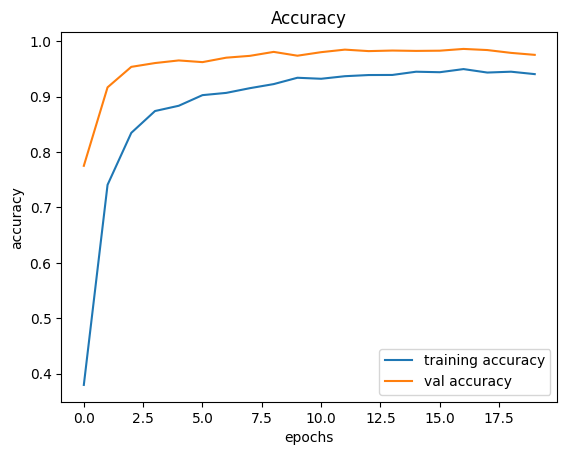

In [13]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Training accuracy loss

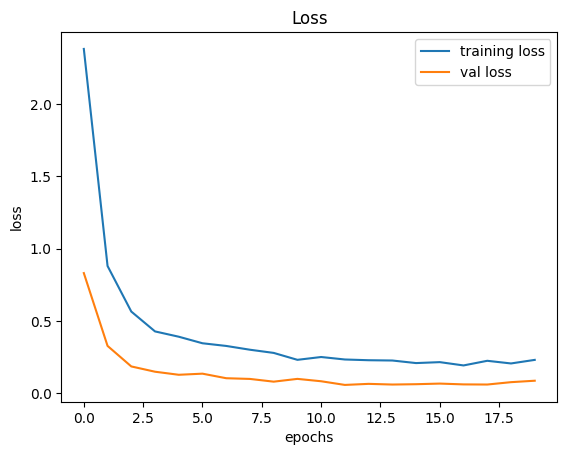

In [14]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Testing on Test Data and accuracy

In [15]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label
X_test_actual, label = testing('Test.csv')

# Accuracy with Test Data

In [16]:
# Y_pred = model.predict(X_test)
Y_pred = np.argmax(model.predict(X_test_actual),axis=1)
print(accuracy_score(label, Y_pred))

0.9369754552652415


# Experimenting model with different batch_sizes

In [17]:
## Experimenting
epochs = 20
batch_size = [16, 32, 64, 128]
# history_train_accuracy = []
# history_train_accuracy = []
# history_training_loss = []
# history_val_loss = []
prediction_score = []
for batch in batch_size:
    history = model.fit(X_train, y_train, batch_size=batch, epochs=epochs, validation_data=(X_test, y_test))
#     history_accuracy.append(history.history['accuracy'])
#     print('Trainng Accuracy    : ',history.history['accuracy'])
#     print('Training Loss       : ', history.history['val_accuracy'])
#     print('Validation Accuracy : ',history.history['accuracy'])
#     print('Validation Loss     : ', history.history['val_accuracy'])
    Y_pred = np.argmax(model.predict(X_test_actual),axis=1)
#     Y_pred = model.predict(X_test_actual)
    prediction_score.append(accuracy_score(label, Y_pred))
    print('Batch size          : ', batch)
    print('Prediction Score    : ', accuracy_score(label, Y_pred))

Train on 31367 samples, validate on 7842 samples
Epoch 1/20
31367/31367 [==============================] - 16s 498us/step - loss: 0.4563 - accuracy: 0.8982 - val_loss: 0.1378 - val_accuracy: 0.9625
Epoch 2/20
31367/31367 [==============================] - 15s 490us/step - loss: 0.3461 - accuracy: 0.9169 - val_loss: 0.0836 - val_accuracy: 0.9796
Epoch 3/20
31367/31367 [==============================] - 15s 490us/step - loss: 0.3752 - accuracy: 0.9167 - val_loss: 0.0772 - val_accuracy: 0.9829
Epoch 4/20
31367/31367 [==============================] - 15s 489us/step - loss: 0.3479 - accuracy: 0.9205 - val_loss: 0.1850 - val_accuracy: 0.9507
Epoch 5/20
31367/31367 [==============================] - 16s 500us/step - loss: 0.4117 - accuracy: 0.9083 - val_loss: 0.1113 - val_accuracy: 0.9707
Epoch 6/20
31367/31367 [==============================] - 15s 490us/step - loss: 0.3556 - accuracy: 0.9181 - val_loss: 0.0900 - val_accuracy: 0.9763
Epoch 7/20
31367/31367 [==============================] -

31367/31367 [==============================] - 5s 163us/step - loss: 0.1911 - accuracy: 0.9581 - val_loss: 0.0723 - val_accuracy: 0.9862
Epoch 15/20
31367/31367 [==============================] - 5s 162us/step - loss: 0.2355 - accuracy: 0.9470 - val_loss: 0.1176 - val_accuracy: 0.9805
Epoch 16/20
31367/31367 [==============================] - 5s 162us/step - loss: 0.2295 - accuracy: 0.9526 - val_loss: 0.0766 - val_accuracy: 0.9850
Epoch 17/20
31367/31367 [==============================] - 5s 162us/step - loss: 0.2485 - accuracy: 0.9478 - val_loss: 0.0837 - val_accuracy: 0.9852
Epoch 18/20
31367/31367 [==============================] - 5s 163us/step - loss: 0.2629 - accuracy: 0.9452 - val_loss: 0.1289 - val_accuracy: 0.9711
Epoch 19/20
31367/31367 [==============================] - 5s 163us/step - loss: 0.1900 - accuracy: 0.9560 - val_loss: 0.0513 - val_accuracy: 0.9902
Epoch 20/20
31367/31367 [==============================] - 5s 162us/step - loss: 0.1806 - accuracy: 0.9603 - val_loss:

## Save the model 

In [18]:
model.save("./training/TSR.h5")

## GUI to to classify an uploaded image

In [19]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('./training/TSR.h5')
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
           2:'Speed limit (30km/h)',
           3:'Speed limit (50km/h)',
           4:'Speed limit (60km/h)',
           5:'Speed limit (70km/h)',
           6:'Speed limit (80km/h)',
           7:'End of speed limit (80km/h)',
           8:'Speed limit (100km/h)',
           9:'Speed limit (120km/h)',
           10:'No passing',
           11:'No passing veh over 3.5 tons',
           12:'Right-of-way at intersection',
           13:'Priority road',
           14:'Yield',
           15:'Stop',
           16:'No vehicles',
           17:'Veh > 3.5 tons prohibited',
           18:'No entry',
           19:'General caution',
           20:'Dangerous curve left',
           21:'Dangerous curve right',
           22:'Double curve',
           23:'Bumpy road',
           24:'Slippery road',
           25:'Road narrows on the right',
           26:'Road work',
           27:'Traffic signals',
           28:'Pedestrians',
           29:'Children crossing',
           30:'Bicycles crossing',
           31:'Beware of ice/snow',
           32:'Wild animals crossing',
           33:'End speed + passing limits',
           34:'Turn right ahead',
           35:'Turn left ahead',
           36:'Ahead only',
           37:'Go straight or right',
           38:'Go straight or left',
           39:'Keep right',
           40:'Keep left',
           41:'Roundabout mandatory',
           42:'End of no passing',
           43:'End no passing vehicle with a weight greater than 3.5 tons' }
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
   global label_packed
   image = Image.open(file_path)
   image = image.resize((30,30))
   image = numpy.expand_dims(image, axis=0)
   image = numpy.array(image)
   pred = model.predict_classes([image])[0]
   sign = classes[pred+1]
   print(sign)
   label.configure(foreground='#011638', text=sign)
def show_classify_button(file_path):
   classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
   classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
   classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
       file_path=filedialog.askopenfilename()
       uploaded=Image.open(file_path)
       uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
       im=ImageTk.PhotoImage(uploaded)
       sign_image.configure(image=im)
       sign_image.image=im
       label.configure(text='')
#        larger_image = image.zoom(20, 20)
# create a label to display the enlarged image
#        label = Label(root, image=larger_image)
       show_classify_button(file_path)
    except:
           pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)

label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="check traffic sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

Slippery road
Right-of-way at intersection
End of no passing
